### MACHINE LEARNING PROJECT I

#### TEAM MEMBERS: ASLI YORUSUN - ERDEM BOCUGOZ - SERIF SONER SERBEST

In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import datetime
import matplotlib.pyplot as plt

from helpers import *
from implementations import *
from data import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Importing Raw Data

In [3]:
prediction,data,id_ = load_csv_data("train.csv", sub_sample=False)

In [4]:
data.shape

(250000, 30)

### Data Processing

In [5]:
pred_0, pred_1, pred_2, data_0, data_1, data_2, indices_0, indices_1, indices_2 = categorize_data(prediction, data)

In [6]:
x, mean_x, std_x = process_data(data)
y, tx = build_model_data(prediction, x)

x0, mean_x0, std_x0 = process_data(data_0)
y0, tx0 = build_model_data(pred_0,x0)

x1, mean_x1, std_x1 = process_data(data_1)
y1, tx1 = build_model_data(pred_1,x1)

x2, mean_x2, std_x2 = process_data(data_2)
y2, tx2 = build_model_data(pred_2,x2)

### Gradient Descent

In [ ]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.1

# Initialization
initial_w = np.zeros(tx.shape[1])

weights, loss = least_squares_GD(y, tx, initial_w, max_iters, gamma)

### Stochastic Gradient Descent

In [ ]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.1

# Initialization
initial_w = np.zeros(tx.shape[1])

weights, loss = least_squares_GD(y, tx, initial_w, max_iters, gamma)

### Least Squares

In [ ]:
weights, loss = least_squares(y, tx)

### Ridge Regression

In [ ]:
seed = 1
degree = 10
split_ratio = 0.9
lambdas = np.logspace(-10, 0, 50)

lambda_ = select_hyperparameter_for_ridge_regression(x, y, degree, split_ratio, seed, lambdas)

### Cross Validation

In [ ]:
seed = 32
degree = 2
k_fold = 5
step = 3
lambdas = np.logspace(-10, 0, step)

# Cross Validation for Ridge Regression
lambda_ = select_hyperparameter_with_cross_validation(y, x, seed, degree, k_fold, step, lambdas)
weights, loss = ridge_regression(y, tx, lambda_)

#### Cross Validation for Subsets

Selecting Hyperparameter By Using 5-fold Cross Validation...
Hyperparameter Selection: Lambda = 0.014563484775012445
Ridge Regression: RMSE Loss = 0.341864668286938


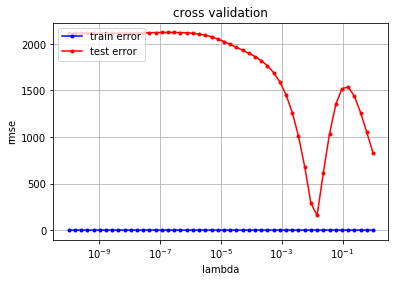

In [20]:
seed = 56
degree0 = 4
k_fold = 5
step = 50
lambdas = np.logspace(-10, 0, step)

# Cross Validation for Ridge Regression
lambda_0 = select_hyperparameter_with_cross_validation(y0, x0, seed, degree, k_fold, step, lambdas)

poly_tx0 = build_poly(x0, degree0)
w0, loss0 = ridge_regression(y0, poly_tx0, lambda_0)

Selecting Hyperparameter By Using 5-fold Cross Validation...
Hyperparameter Selection: Lambda = 0.0005428675439323859
Ridge Regression: RMSE Loss = 0.38013396065552507


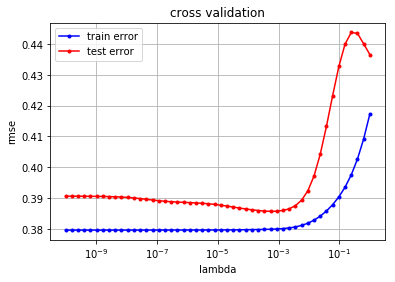

In [26]:
seed = 56
degree1 = 7
k_fold = 5
step = 50
lambdas = np.logspace(-10, 0, step)

# Cross Validation for Ridge Regression
lambda_1 = select_hyperparameter_with_cross_validation(y1, x1, seed, degree, k_fold, step, lambdas)

poly_tx1 = build_poly(x1, degree1)
w1, loss1 = ridge_regression(y1, poly_tx1, lambda_1)

Selecting Hyperparameter By Using 5-fold Cross Validation...
Hyperparameter Selection: Lambda = 0.001389495494373139
Ridge Regression: RMSE Loss = 0.3504859389506472


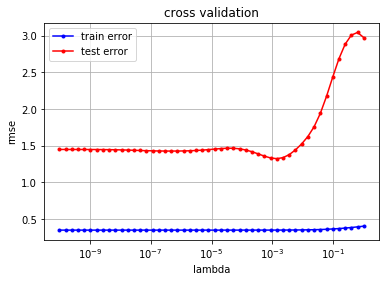

In [22]:
seed = 56
degree2 = 9
k_fold = 5
step = 50
lambdas = np.logspace(-10, 0, step)

# Cross Validation for Ridge Regression
lambda_2 = select_hyperparameter_with_cross_validation(y2, x2, seed, degree, k_fold, step, lambdas)

poly_tx2 = build_poly(x2, degree2)
w2, loss2 = ridge_regression(y2, poly_tx2, lambda_2)

In [27]:
### Test Rid Reg

y_pred0 = predict_labels(w0,poly_tx0)
y_pred1 = predict_labels(w1,poly_tx1)
y_pred2 = predict_labels(w2,poly_tx2)

y_pred0 = np.expand_dims(y_pred0, axis=1)
y_pred1 = np.expand_dims(y_pred1, axis=1)
y_pred2 = np.expand_dims(y_pred2, axis=1)


rows = prediction.shape[0]
labels = decategorize_prediction(rows, y_pred0, y_pred1, y_pred2, indices_0, indices_1, indices_2)

labels = np.where(labels == -1, 0, labels)

score = np.invert(np.logical_xor(prediction, np.squeeze(labels)))
score.mean()

0.828864

### Logistic Regression

In [ ]:
# init parameters
max_iter = 100
gamma = 0.1

weights, loss = logistic_regression(y, tx, max_iter, gamma)

#### Logistic Regression for Subsets

In [ ]:
# init parameters
max_iter = 100
gamma = 0.1

w0, loss0 = logistic_regression(y0, tx0, max_iter, gamma)

In [ ]:
w1, loss1 = logistic_regression(y1, tx1, max_iter, gamma)

In [ ]:
w2, loss2 = logistic_regression(y2, tx2, max_iter, gamma)

#### Testing Logistic Regression Results

In [13]:
### Test Log Reg

y_pred0 = predict_labels(w0,tx0)
y_pred1 = predict_labels(w1,tx1)
y_pred2 = predict_labels(w2,tx2)

rows = prediction.shape[0]
labels = decategorize_prediction(rows, y_pred0, y_pred1, y_pred2, indices_0, indices_1, indices_2)

labels = np.where(labels == -1, 0, labels)

score = np.invert(np.logical_xor(prediction, np.squeeze(labels)))
score.mean()

ValueError: shapes (99913,19) and (226,) not aligned: 19 (dim 1) != 226 (dim 0)

### Regularized Logistic Regression

In [ ]:
# Define the parameters of the algorithm.
max_iter = 100
gamma = 0.1

weights, loss = reg_logistic_regression(y, tx, lambda_, max_iter, gamma)

#### Regularized Logistic Regression for Subsets

In [ ]:
# Define the parameters of the algorithm.
max_iter = 100
gamma = 0.1

w0, loss0 = reg_logistic_regression(y0, tx0, lambda_,max_iter, gamma)

In [ ]:
w1, loss1 = reg_logistic_regression(y1, tx1, lambda_,max_iter, gamma)

In [ ]:
w2, loss2 = reg_logistic_regression(y2, tx2, lambda_,max_iter, gamma)

### Submission of Results

In [39]:
test_label,test_data,test_id_ = load_csv_data("test.csv", sub_sample=False)

# Split the data
pred_0_test, pred_1_test, pred_2_test, data_0_test, data_1_test, data_2_test, indices_0_test, indices_1_test, indices_2_test = categorize_data(test_label, test_data)




# Clean the data
x0_test, _, _ = process_data(data_0_test)
x1_test, _, _ = process_data(data_1_test)
x2_test, _, _ = process_data(data_2_test)

# Build tx
#y0_test, tx0_test = build_model_data(pred_0_test,x0_test)
#y1_test, tx1_test = build_model_data(pred_1_test,x1_test)
#y2_test, tx2_test = build_model_data(pred_2_test,x2_test)

degree0 = 4
degree1 = 7
degree2 = 9

# Build poly tx
poly_tx0 = build_poly(x0_test, degree0)
poly_tx1 = build_poly(x1_test, degree1)
poly_tx2 = build_poly(x2_test, degree2)

# Label predictions
y_pred0 = predict_labels(w0,poly_tx0)
y_pred1 = predict_labels(w1,poly_tx1)
y_pred2 = predict_labels(w2,poly_tx2)

y_pred0 = np.expand_dims(y_pred0, axis=1)
y_pred1 = np.expand_dims(y_pred1, axis=1)
y_pred2 = np.expand_dims(y_pred2, axis=1)



# Prepare for submission
rows = test_label.shape[0]
labels = decategorize_prediction(rows, y_pred0, y_pred1, y_pred2, indices_0_test, indices_1_test, indices_2_test)

# Create submission file
create_csv_submission(test_id_,labels,"submission.csv")

In [40]:
print(test_data.shape)

print(indices_0_test.shape)
print(indices_1_test.shape)
print(indices_2_test.shape)
print(x0_test.shape)

(568238, 30)
(227458,)
(175338,)
(165442,)
(227458, 18)
